<a href="https://colab.research.google.com/github/Sumit189/Abusive-Language-Detection/blob/main/notebook/Abusive_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 133kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from joblib import dump

In [3]:
sklearn.__version__

'0.24.1'

In [4]:
!cp /content/drive/MyDrive/ExpertSystem/clean_data.csv /content/

In [5]:
data = pd.read_csv("clean_data.csv")

In [6]:
data.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [7]:
count_not_abusive = 0
count_abusive = 0
for i in data.is_offensive:
  if i == 0:
    count_not_abusive += 1
  else:
    count_abusive += 1

print("Non Abusive: {}".format(count_not_abusive))
print("Abusive: {}".format(count_abusive))

Non Abusive: 147509
Abusive: 36845


In [8]:
texts = data["text"].astype(str)
y = data["is_offensive"]

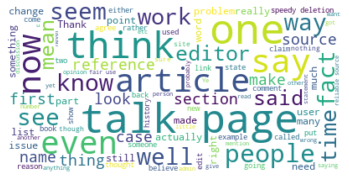

In [9]:
word_text = " ".join(map(str, texts))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.0001)
X = vectorizer.fit_transform(texts)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:
rf = RandomForestClassifier(max_depth=100, random_state=0)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [15]:
rf_y_hat = rf.predict(X_test)
accuracy_score(rf_y_hat, y_test) 

0.942827696563695

In [16]:
rf_score = accuracy_score(rf_y_hat, y_test) 

In [17]:
model = LinearSVC(class_weight="balanced", dual=False, tol=1e-2, max_iter=1e5)
cclf = CalibratedClassifierCV(base_estimator=model)
cclf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(class_weight='balanced',
                                                dual=False, max_iter=100000.0,
                                                tol=0.01))

In [18]:
y_hat = cclf.predict(X_test)
cc_score = accuracy_score(y_hat, y_test) 
print(cc_score)

0.9577988120745301


In [19]:
dt = DecisionTreeClassifier(random_state=0)

In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
dt_y_hat = dt.predict(X_test)
dt_score = accuracy_score(dt_y_hat, y_test)
print(dt_score)

0.9433972498711725


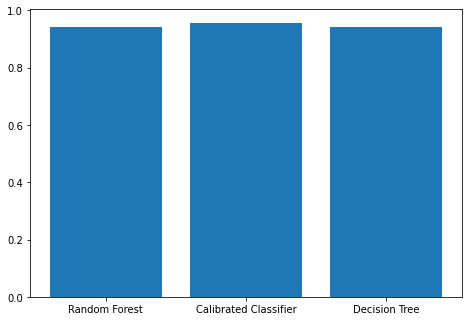

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Random Forest', 'Calibrated Classifier', 'Decision Tree']
acc = [rf_score, cc_score, dt_score]
ax.bar(classifiers,acc)
plt.show()

# Train on Whole Set

In [23]:
model = LinearSVC(class_weight="balanced", dual=False, tol=1e-2, max_iter=1e5)
best_cclf = CalibratedClassifierCV(base_estimator=model)
best_cclf.fit(X, y)

CalibratedClassifierCV(base_estimator=LinearSVC(class_weight='balanced',
                                                dual=False, max_iter=100000.0,
                                                tol=0.01))

# Save Model

In [24]:
dump(vectorizer, "vectorizer.joblib")
dump(best_cclf, "bestmodel.joblib")

['bestmodel.joblib']

In [25]:
!cp /content/bestmodel.joblib  /content/drive/MyDrive/ExpertSystem/

In [26]:
!cp /content/vectorizer.joblib  /content/drive/MyDrive/ExpertSystem/

# Test

In [27]:
test_str = str(input())

I will throw you out idiot


In [28]:
test_x=vectorizer.transform([test_str])

In [29]:
cclf.predict(test_x)

array([1])

In [30]:
cclf.predict_proba(test_x)

array([[3.78139952e-04, 9.99621860e-01]])

In [31]:
np.max(cclf.predict_proba(test_x))*100

99.96218600476115

In [32]:
labels = ['Non Abusive', 'Abusive']

In [33]:
print("Tone: {}, Probability Score: {:.2f}%".format(labels[cclf.predict(test_x)[0]], (np.max(cclf.predict_proba(test_x))*100))) 

Tone: Abusive, Probability Score: 99.96%
